### This file generates the ground truth images

It also shows the images in real time in jupyter console. 
By default, only test labels are generated. For train label, please change the path in examples variable. 
To run this file, you need proper paths in path variable (for example: for vis utils and label map utils, you need path to object detection folder)

In [51]:
from utils import label_map_util
from utils import visualization_utils as vis_util
from PIL import Image
import numpy as np
import pandas as pd
import os
from collections import namedtuple
import matplotlib.pyplot as plt

In [52]:
# Below function for label map text generation
def class_text_to_int(row_label):
    all_categories = label_map_util.get_label_map_dict(LABEL_MAP_PATH)
    return all_categories[row_label]

# This will split the csv file into filename wise objects
def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

# as the name suggests
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [53]:
PATH_TO_LABELS = r'/home/diana/compressedCV/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt'
LABEL_MAP_PATH = r'/home/hitansh/compressedCV/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt'
CSV_FOLDER = r'/home/ubuntu/data/data_original/csv/'

# change below for another folder like train
IMAGE_PATH_BASE = r'/home/ubuntu/data/data_original/test/'

# change below also
examples = pd.read_csv(os.path.join(CSV_FOLDER, 'test_labels_jpg.csv'))

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
grouped = split(examples, 'filename')

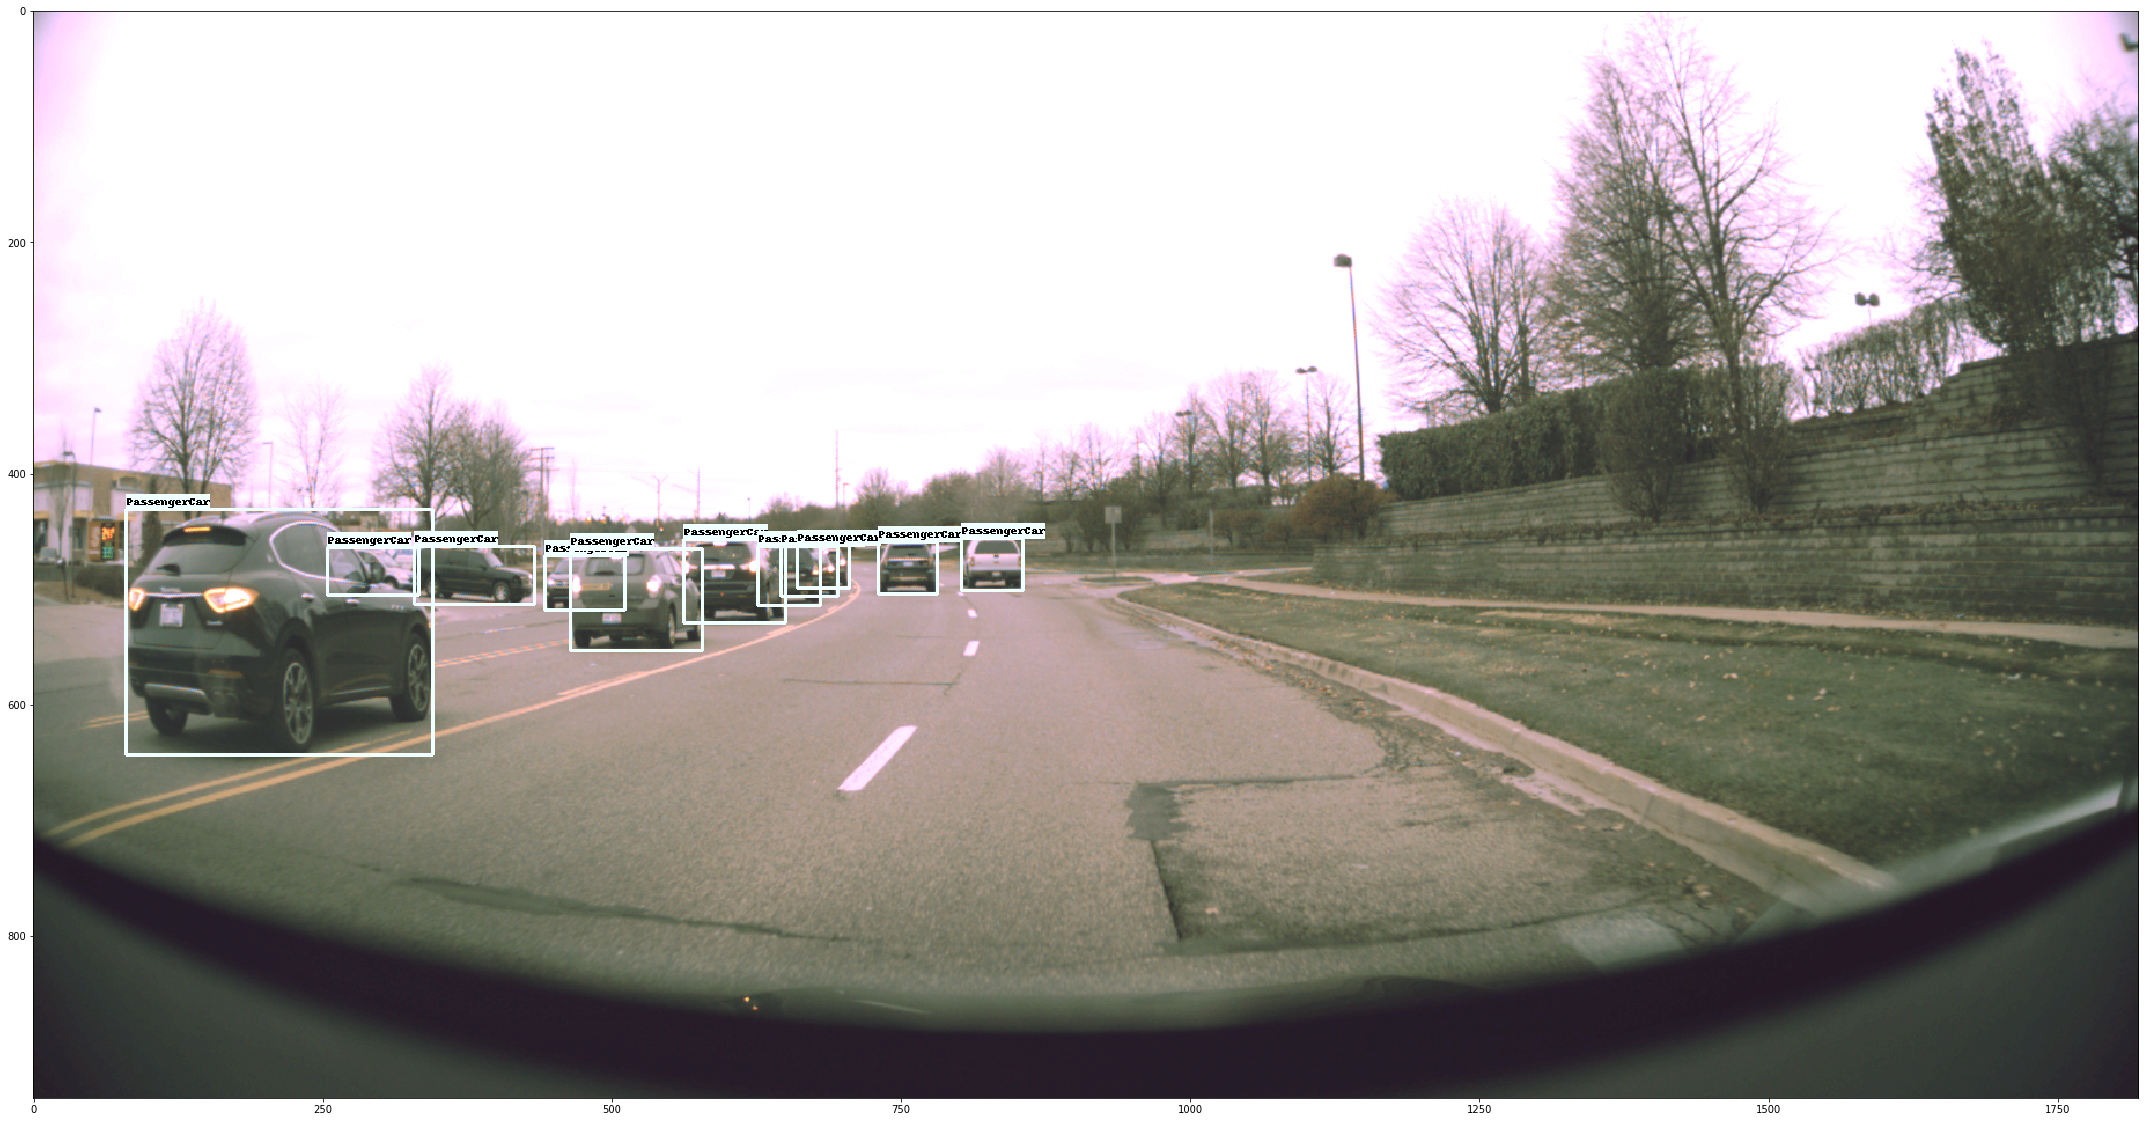

In [54]:
# matplot lib inline to show the images here
%matplotlib inline

#change from [:1] below to more if you want to see and save more samples
for i in grouped[:1]:
    image_path = os.path.join(IMAGE_PATH_BASE, i[0][:-4]+'.bmp')
    image = Image.open(image_path)
    image_np = load_image_into_numpy_array(image)
    boxes = []
    classes = []
    scores = []
    for index, row in i[1].iterrows():
        classes.append(class_text_to_int(row['class']))
        box = []
        box.append(row['ymin'])
        box.append(row['xmin'])
        box.append(row['ymax'])
        box.append(row['xmax'])
        scores.append(100)
        boxes.append(box)
    vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      np.array(boxes),
      np.array(classes),
      np.array(scores),
      category_index,
      use_normalized_coordinates=False,
      line_thickness=3,
      skip_scores=True)
    plt.figure(figsize=(50,20))
    plt.imshow(image_np)
    plt.savefig(i[0])